In [1]:
#pip install tensorflow scikit-learn matplotlib


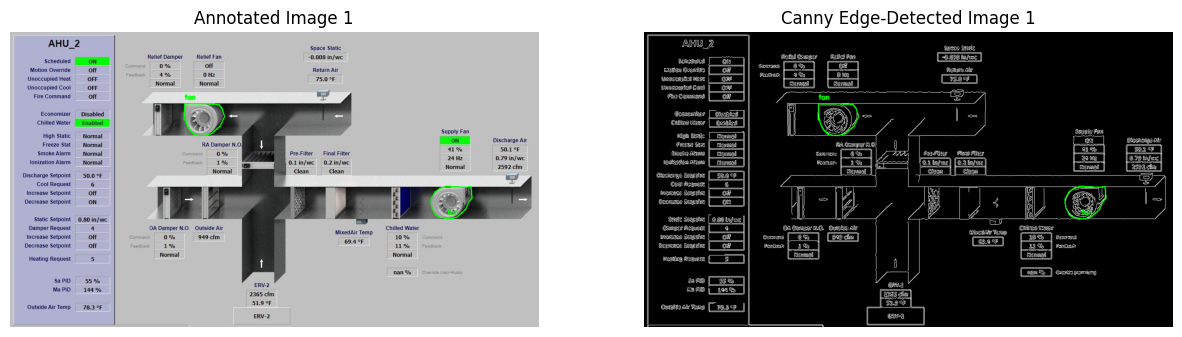

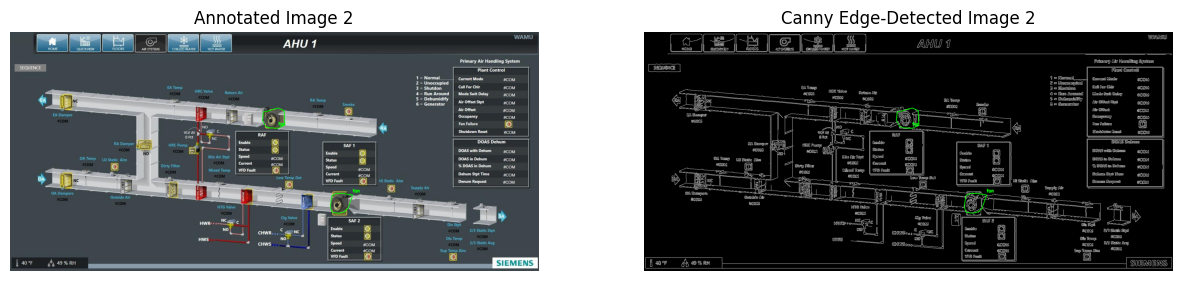

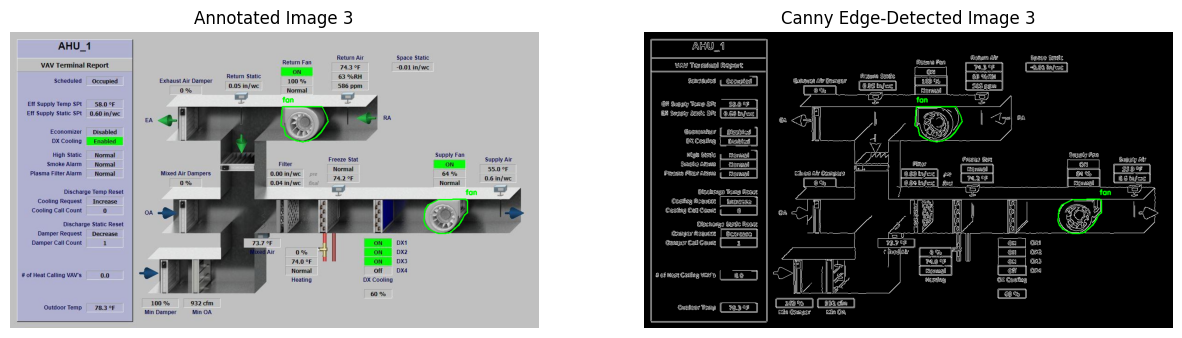

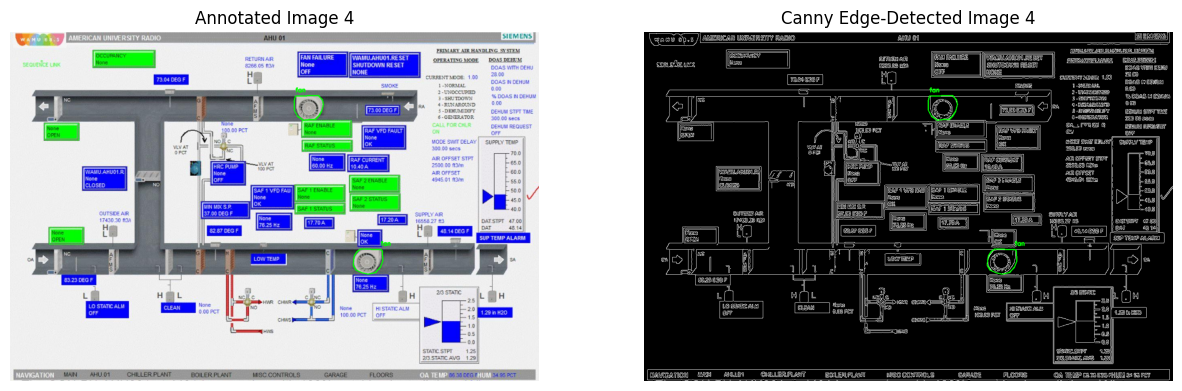

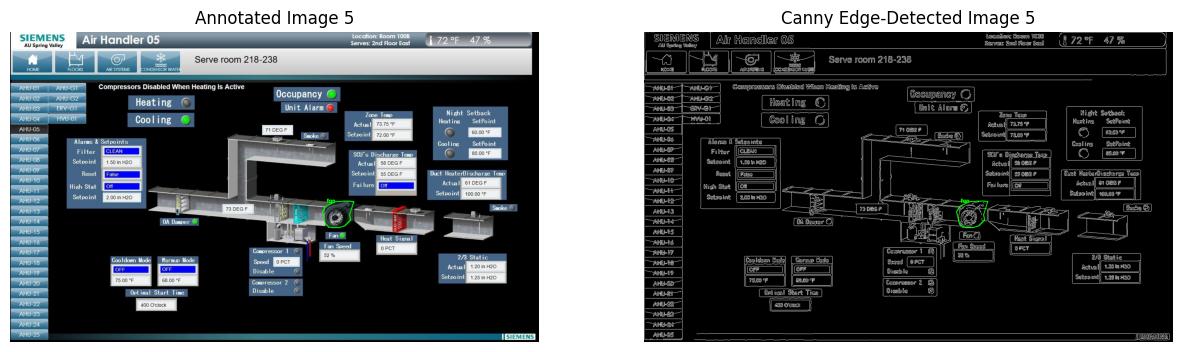

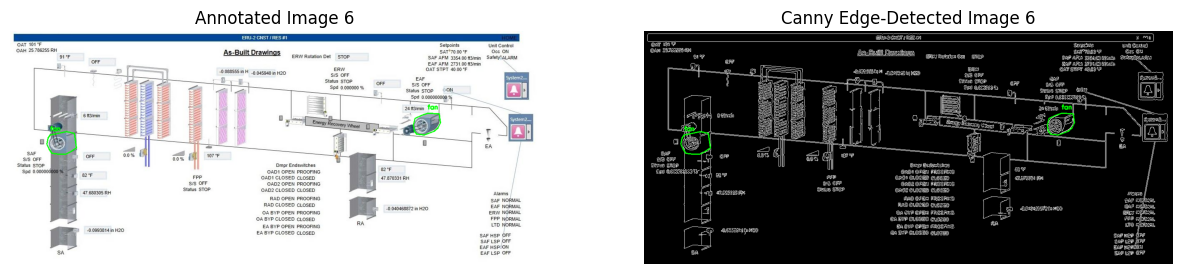

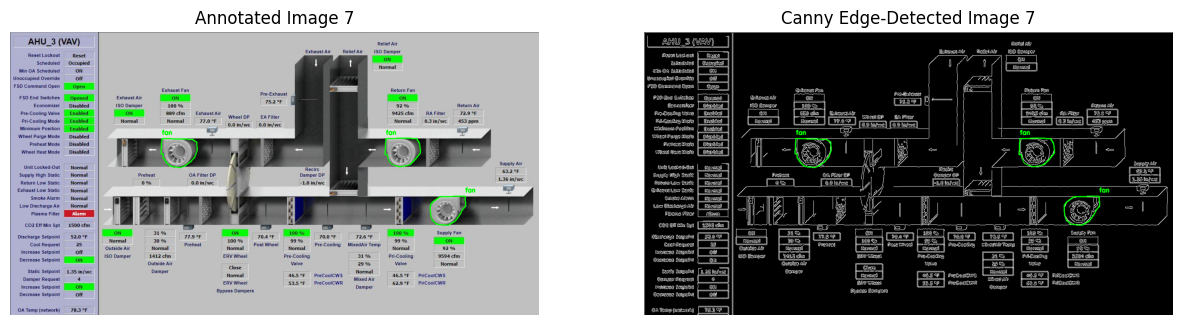

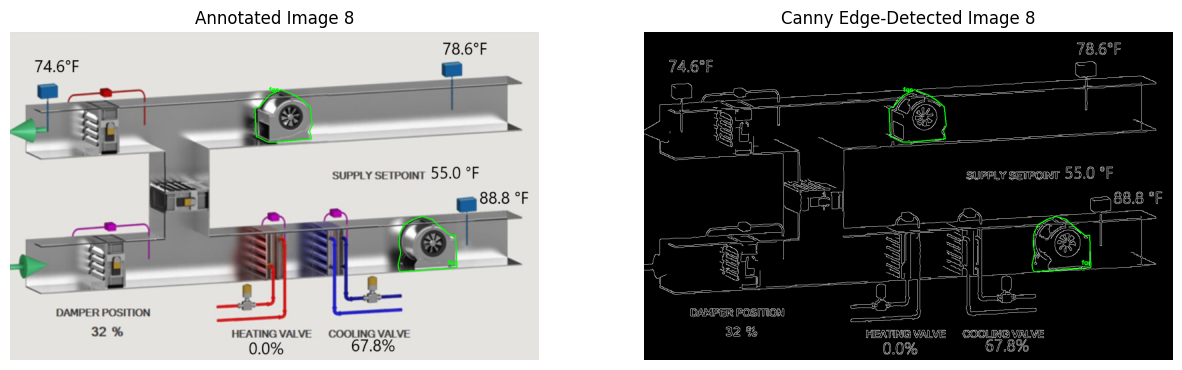

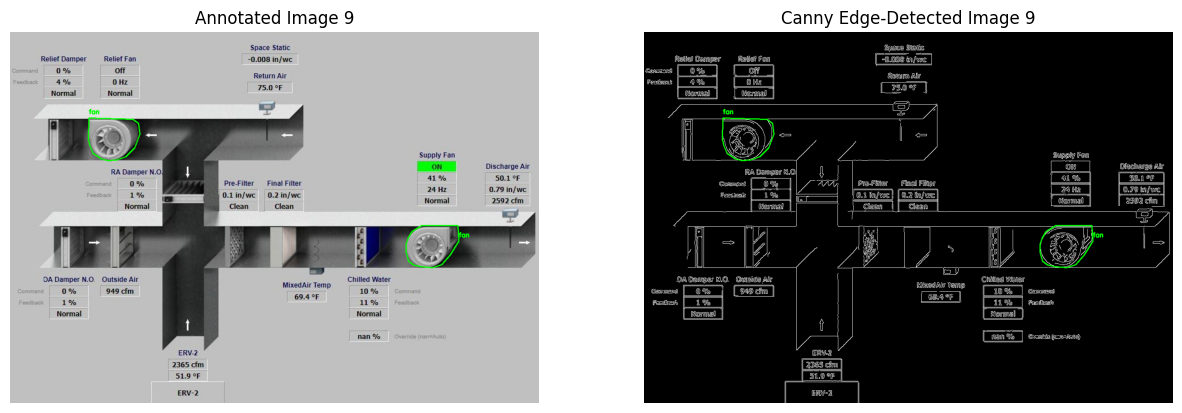

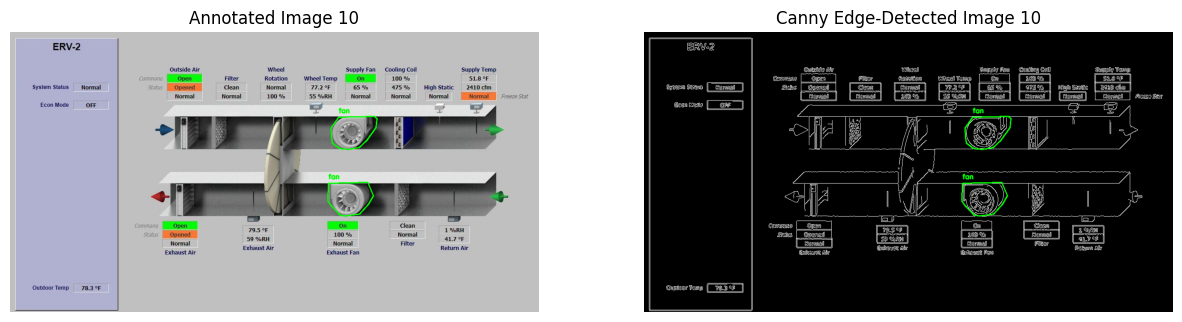

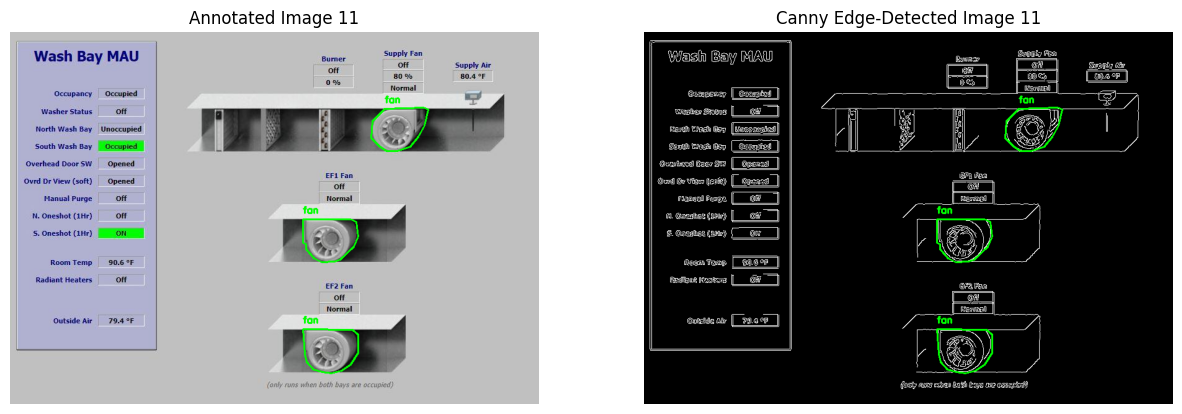

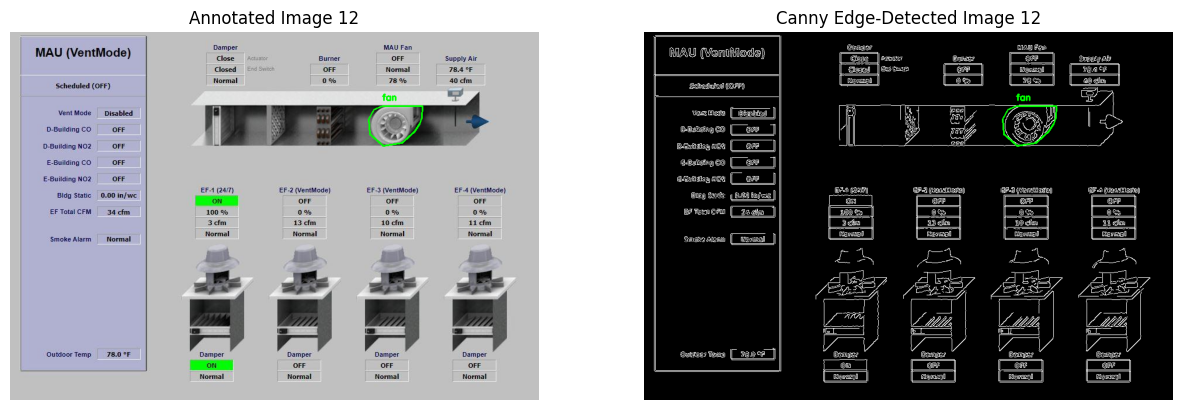

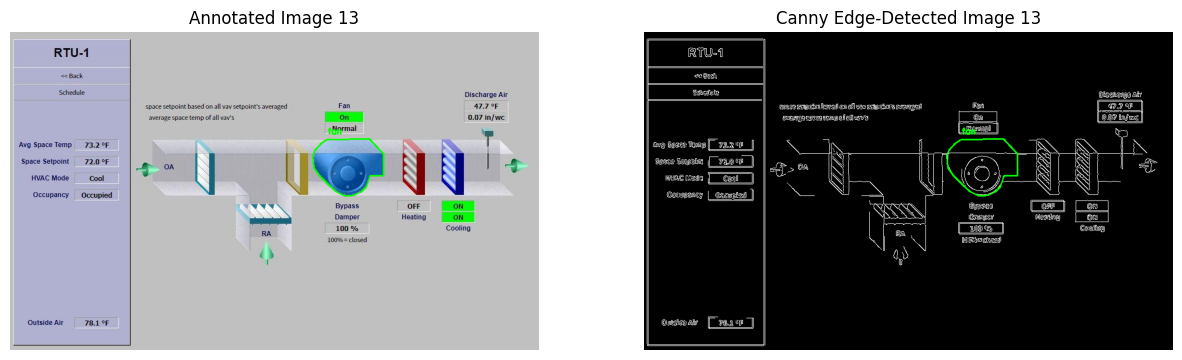

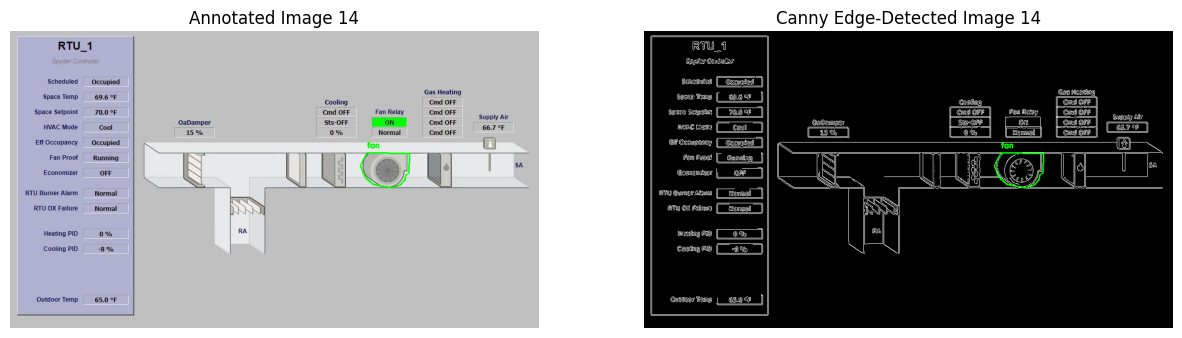

Epoch 1/20


c:\Users\bbartling\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\bbartling\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/20
1/1 ━━━

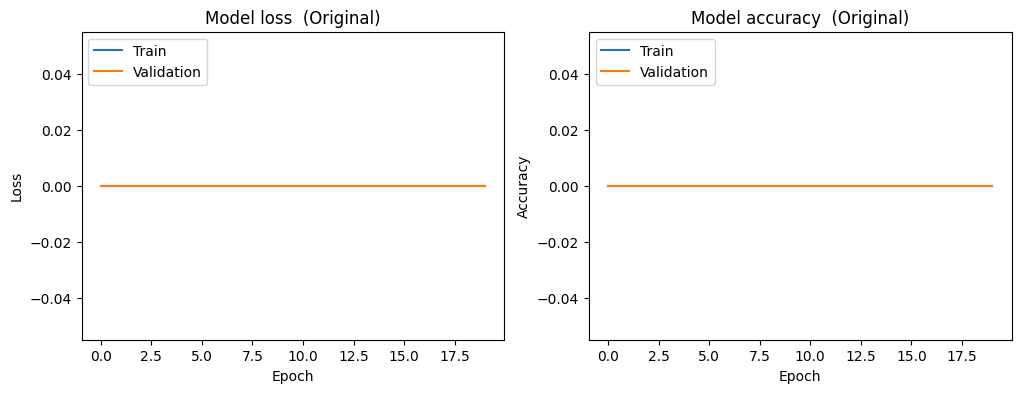

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8

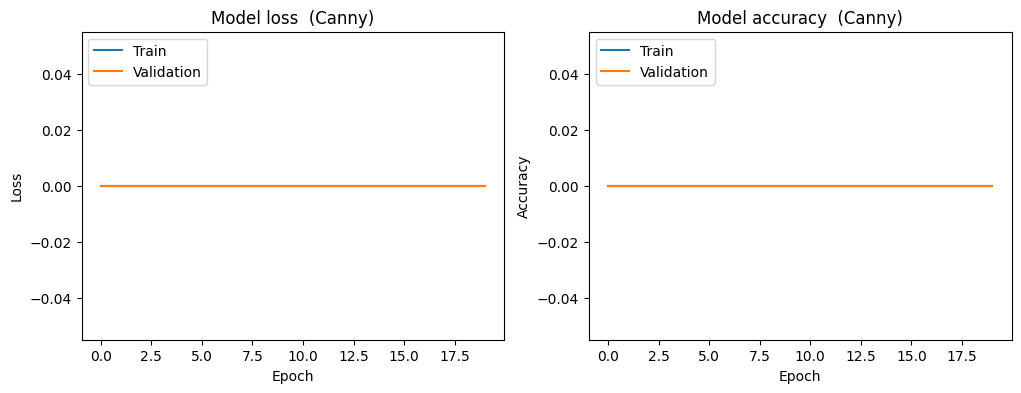

In [2]:
import os
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Define the directory path
src_directory = r'C:\Users\bbartling\Desktop\HVACGraphicsClassifier\data\ahu'

# Function to load data with annotations
def load_data_with_annotations(src_dir):
    images = []
    annotations = []
    labels = []

    for root, dirs, files in os.walk(src_dir):
        for file in files:
            if file.endswith('.json'):
                json_path = os.path.join(root, file)
                with open(json_path, 'r') as f:
                    annotation_data = json.load(f)

                img_file = file.replace('.json', '.JPG')
                img_path = os.path.join(root, img_file)

                if not os.path.exists(img_path):
                    continue

                # Load image
                img = load_img(img_path)
                img_cv2 = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

                # Store images and annotations
                images.append(img_cv2)
                annotations.append(annotation_data['shapes'])

                # Extract primary label from the first annotation
                primary_label = annotation_data['shapes'][0]['label'] if annotation_data['shapes'] else 'unknown'
                labels.append(primary_label)

    return images, annotations, labels

images, annotations, labels = load_data_with_annotations(src_directory)

# Extract unique class names
class_names = list(set(labels))

# Map labels to integers
label_to_index = {name: i for i, name in enumerate(class_names)}
indexed_labels = [label_to_index[label] for label in labels]

# Function to draw polygons on image
def draw_annotations(img, annotations):
    for annotation in annotations:
        label = annotation.get('label', 'N/A')
        points = np.array(annotation['points'], dtype=np.int32)
        points = points.reshape((-1, 1, 2))

        cv2.polylines(img, [points], isClosed=True, color=(0, 255, 0), thickness=2)
        x, y = points[0][0]
        cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return img

# Function to resize images
def resize_images(images, target_size=(224, 224)):
    resized_images = []
    for img in images:
        resized_img = cv2.resize(img, target_size)
        resized_images.append(resized_img)
    return resized_images

# Function to process images with annotations and Canny edge detection
def process_images_with_annotations_and_canny(images, annotations):
    processed_images = []
    canny_images = []

    for i in range(len(images)):
        original_img = images[i].copy()
        annotated_img = draw_annotations(original_img.copy(), annotations[i])

        # Apply Canny edge detection
        gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 100, 200)
        edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
        edges_annotated = draw_annotations(edges_colored.copy(), annotations[i])

        processed_images.append(annotated_img)
        canny_images.append(edges_annotated)

        plt.figure(figsize=(15, 15))

        # Display the original image with annotations
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
        plt.title(f"Annotated Image {i+1}")
        plt.axis('off')

        # Display the Canny edge-detected image with annotations
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(edges_annotated, cv2.COLOR_BGR2RGB))
        plt.title(f"Canny Edge-Detected Image {i+1}")
        plt.axis('off')

        plt.show()

    return processed_images, canny_images

processed_images, canny_images = process_images_with_annotations_and_canny(images, annotations)

# Resize images
processed_images = resize_images(processed_images, target_size=(224, 224))
canny_images = resize_images(canny_images, target_size=(224, 224))

# Preprocess images for EfficientNetB0
original_images = tf.keras.applications.efficientnet.preprocess_input(np.array(processed_images))
canny_images = tf.keras.applications.efficientnet.preprocess_input(np.array(canny_images))

def create_model(input_shape, num_classes):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    
    for layer in base_model.layers:
        layer.trainable = False
        
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def plot_history(history, title_suffix):
    plt.figure(figsize=(12, 4))
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model loss {title_suffix}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model accuracy {title_suffix}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()

# Split data into training and validation sets if data is loaded
if len(original_images) > 0 and len(canny_images) > 0:
    # Split data into training and validation sets for original images
    X_train_orig, X_val_orig, y_train, y_val = train_test_split(original_images, indexed_labels, test_size=0.2, random_state=42)
    
    # Split data into training and validation sets for Canny images
    X_train_canny, X_val_canny, _, _ = train_test_split(canny_images, indexed_labels, test_size=0.2, random_state=42)

    # Define ImageDataGenerator with augmentation for training data
    train_datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    val_datagen = ImageDataGenerator()

    # Create data generators for original images
    train_generator_orig = train_datagen.flow(X_train_orig, y_train, batch_size=32)
    val_generator_orig = val_datagen.flow(X_val_orig, y_val, batch_size=32)

    # Create and train the model for original images
    input_shape = (224, 224, 3)
    num_classes = len(class_names)
    model_orig = create_model(input_shape, num_classes)
    history_orig = model_orig.fit(train_generator_orig, validation_data=val_generator_orig, epochs=20)
    model_orig.save(r'C:\Users\bbartling\Desktop\HVACGraphicsClassifier\models\hvac_classifier_efficientnet_original.keras')

    # Plot the training history for original images
    plot_history(history_orig, " (Original)")

    # Create data generators for Canny images
    train_generator_canny = train_datagen.flow(X_train_canny, y_train, batch_size=32)
    val_generator_canny = val_datagen.flow(X_val_canny, y_val, batch_size=32)

    # Create and train the model for Canny images
    model_canny = create_model(input_shape, num_classes)
    history_canny = model_canny.fit(train_generator_canny, validation_data=val_generator_canny, epochs=20)
    model_canny.save(r'C:\Users\bbartling\Desktop\HVACGraphicsClassifier\models\hvac_classifier_efficientnet_canny.keras')

    # Plot the training history for Canny images
    plot_history(history_canny, " (Canny)")

else:
    print("No images found in the specified directory.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Image: test_ahu1.png (Original)
Predicted Label: fan
Prediction Scores: [1.]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Image: test_ahu1.png (Canny)
Predicted Label: fan
Prediction Scores: [1.]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Image: test_ahu2.png (Original)
Predicted Label: fan
Prediction Scores: [1.]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Image: test_ahu2.png (Canny)
Predicted Label: fan
Prediction Scores: [1.]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Image: test_ahu3.png (Original)
Predicted Label: fan
Prediction Scores: [1.]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Image: test_ahu3.png (Canny)
Predicted Label: fan
Prediction Scores: [1.]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Image: test_ahu4.png (Original)
Predicted Label: fan
Prediction Scores: [1.]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Image: test_ahu4.png (Canny)
Predicted Label: fan
Prediction Scores: [1.]

Displaying image: test_ahu1.png with original prediction


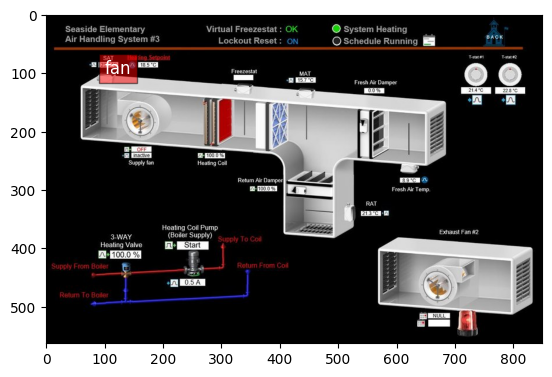

Displaying image: test_ahu1.png with Canny prediction


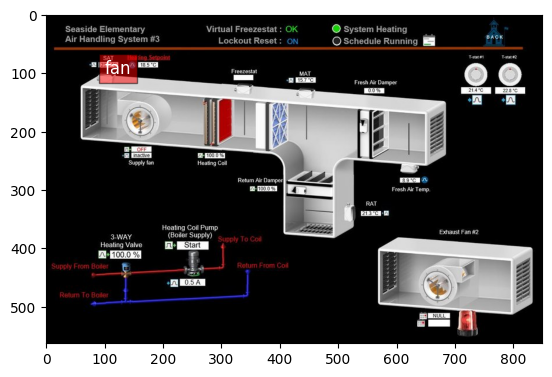

Displaying image: test_ahu2.png with original prediction


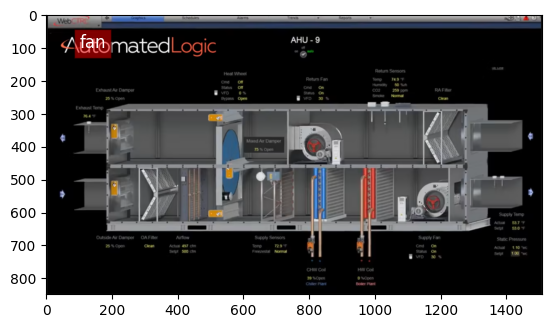

Displaying image: test_ahu2.png with Canny prediction


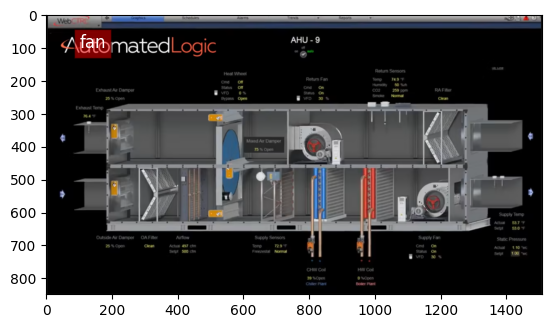

Displaying image: test_ahu3.png with original prediction


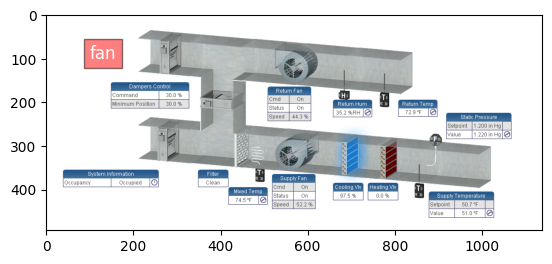

Displaying image: test_ahu3.png with Canny prediction


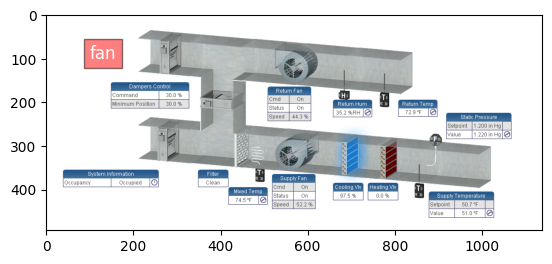

Displaying image: test_ahu4.png with original prediction


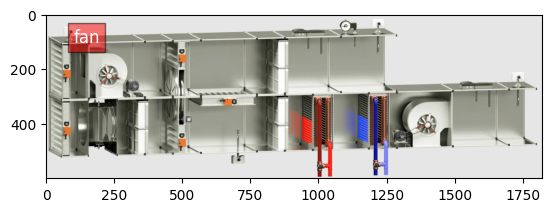

Displaying image: test_ahu4.png with Canny prediction


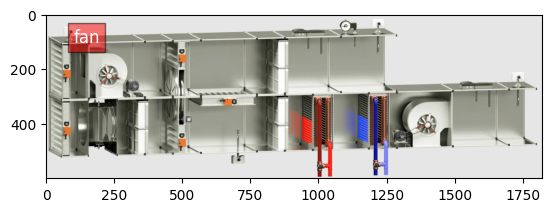

In [5]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2

# Ensure that only the valid class names are used
class_names = ["fan"]

# Function to apply Canny edge detection
def apply_canny_edge_detection(img_array):
    gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
    return edges_colored

# Function to load and preprocess an image with or without Canny edge detection
def load_and_preprocess_image(image_path, apply_canny=False, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img).astype('uint8')  # Ensure the correct data type for OpenCV
    if apply_canny:
        img_array = apply_canny_edge_detection(img_array)
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)
    return np.expand_dims(img_array, axis=0)  # Add batch dimension

# Function to predict the class of an image
def predict_image(model, image_path, class_names, apply_canny=False):
    img_array = load_and_preprocess_image(image_path, apply_canny=apply_canny)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_label = class_names[predicted_class]
    return predicted_label, predictions[0]

# Function to display an image with bounding boxes
def display_image_with_boxes(image_path, predicted_label, annotation_data):
    img = load_img(image_path)
    img_array = img_to_array(img) / 255.0  # Rescale the image
    fig, ax = plt.subplots(1)
    ax.imshow(img_array)

    # Draw bounding boxes from annotation data
    for annotation in annotation_data:
        if annotation['label'] == predicted_label and 'points' in annotation:
            points = np.array(annotation['points'], dtype=np.int32)
            points = points.reshape((-1, 1, 2))
            cv2.polylines(img_array, [points], isClosed=True, color=(0, 255, 0), thickness=2)
            x, y = points[0][0]
            plt.text(x, y, annotation['label'], color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
    
    plt.show()

# Load the trained models
model_path_original = r'C:\Users\bbartling\Desktop\HVACGraphicsClassifier\models\hvac_classifier_efficientnet_original.keras'
model_path_canny = r'C:\Users\bbartling\Desktop\HVACGraphicsClassifier\models\hvac_classifier_efficientnet_canny.keras'
model_original = tf.keras.models.load_model(model_path_original)
model_canny = tf.keras.models.load_model(model_path_canny)

# Directory containing test images
test_images_dir = r'C:\Users\bbartling\Desktop\HVACGraphicsClassifier\data\test_images'

# Dictionary to store predictions and annotations
predictions_and_annotations = {}

# Predict each image in the test directory for both models
for img_file in os.listdir(test_images_dir):
    if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(test_images_dir, img_file)

        # Predict with original model
        predicted_label_orig, prediction_scores_orig = predict_image(model_original, img_path, class_names, apply_canny=False)
        print(f"Image: {img_file} (Original)")
        print(f"Predicted Label: {predicted_label_orig}")
        print(f"Prediction Scores: {prediction_scores_orig}\n")

        # Predict with Canny model
        predicted_label_canny, prediction_scores_canny = predict_image(model_canny, img_path, class_names, apply_canny=True)
        print(f"Image: {img_file} (Canny)")
        print(f"Predicted Label: {predicted_label_canny}")
        print(f"Prediction Scores: {prediction_scores_canny}\n")

        # Assuming the annotations are stored in memory in the same format as the previous cell
        # You can modify this according to how you store annotations in memory
        annotations = [
            {
                "label": predicted_label_orig, 
                "points": [(100, 100), (150, 100), (150, 150), (100, 150)]  # Example points
            }
        ]
        
        # Store the results for both versions
        predictions_and_annotations[img_file] = {
            "predicted_label_orig": predicted_label_orig,
            "prediction_scores_orig": prediction_scores_orig,
            "predicted_label_canny": predicted_label_canny,
            "prediction_scores_canny": prediction_scores_canny,
            "annotations": annotations
        }

# Display each image with bounding boxes for both versions
for img_file, data in predictions_and_annotations.items():
    img_path = os.path.join(test_images_dir, img_file)
    predicted_label_orig = data['predicted_label_orig']
    predicted_label_canny = data['predicted_label_canny']
    annotations = data['annotations']

    print(f"Displaying image: {img_file} with original prediction")
    display_image_with_boxes(img_path, predicted_label_orig, annotations)

    print(f"Displaying image: {img_file} with Canny prediction")
    display_image_with_boxes(img_path, predicted_label_canny, annotations)
